In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranavharad012","key":"236d8a5db19480909cf424f79b40428a"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d alsaniipe/flowerdatasets
!unzip flowerdatasets.zip -d flowers

Dataset URL: https://www.kaggle.com/datasets/alsaniipe/flowerdatasets
License(s): apache-2.0
  0% 0.00/57.8M [00:00<?, ?B/s]
100% 57.8M/57.8M [00:00<00:00, 1.41GB/s]
Archive:  flowerdatasets.zip
  inflating: flowers/flowers/train/bluebell/image_0251.jpg  
  inflating: flowers/flowers/train/bluebell/image_0252.jpg  
  inflating: flowers/flowers/train/bluebell/image_0253.jpg  
  inflating: flowers/flowers/train/bluebell/image_0254.jpg  
  inflating: flowers/flowers/train/bluebell/image_0255.jpg  
  inflating: flowers/flowers/train/bluebell/image_0256.jpg  
  inflating: flowers/flowers/train/bluebell/image_0257.jpg  
  inflating: flowers/flowers/train/bluebell/image_0258.jpg  
  inflating: flowers/flowers/train/bluebell/image_0259.jpg  
  inflating: flowers/flowers/train/bluebell/image_0260.jpg  
  inflating: flowers/flowers/train/bluebell/image_0261.jpg  
  inflating: flowers/flowers/train/bluebell/image_0262.jpg  
  inflating: flowers/flowers/train/bluebell/image_0263.jpg  
  inflating:

## Load dataset

In [14]:
import os
import cv2
import numpy as np

dataset_path = 'flowers/flowers/train'
image_paths = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

print(f"Found {len(image_paths)} images in the dataset.")

# Load the first image as an example to prepare for noise application
if image_paths:
    img_path = image_paths[0]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    print(f"Loaded example image: {img_path}")
else:
    img = None
    print("No images found in the specified directory.")

Found 1190 images in the dataset.
Loaded example image: flowers/flowers/train/buttercup/image_1132.jpg


## Apply noise

In [17]:
import numpy as np
import cv2
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(image, prob=0.02):
    noisy_image = np.copy(image)
    rnd = np.random.rand(*image.shape)
    noisy_image[rnd < (prob/2)] = 0
    noisy_image[rnd > 1 - (prob/2)] = 255
    return noisy_image

def add_impulse_noise(image, prob=0.02):
    noisy_image = np.copy(image)
    mask = np.random.rand(*image.shape) < prob
    random_values = np.random.randint(0, 256, image.shape, dtype=np.uint8)
    noisy_image[mask] = random_values[mask]
    return noisy_image

def add_speckle_noise(image, mean=0, sigma=0.2):
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + image * gaussian
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Select 5 random image paths
if image_paths:
    random_image_paths = np.random.choice(image_paths, size=min(5, len(image_paths)), replace=False)
    selected_images = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in random_image_paths]
else:
    selected_images = []
    print("No images found to select from.")

noisy_images_list = []
if selected_images:
    for img in selected_images:
        if img is not None:
            noisy_images = {
                "Original": img,
                "Gaussian Noise": add_gaussian_noise(img.copy()),
                "Salt & Pepper Noise": add_salt_pepper_noise(img.copy()),
                "Impulse Noise": add_impulse_noise(img.copy()),
                "Speckle Noise": add_speckle_noise(img.copy())
            }
            noisy_images_list.append(noisy_images)
        else:
            print("Could not load one of the selected images.")
else:
    print("No images selected to apply noise to.")

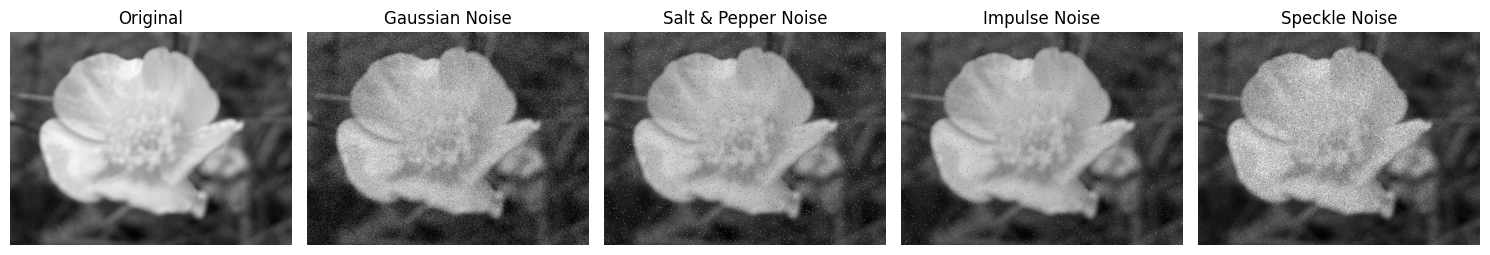

In [16]:
import matplotlib.pyplot as plt

if noisy_images:
    # Get the number of noise types (including original)
    num_noise_types = len(noisy_images)
    fig, axes = plt.subplots(1, num_noise_types, figsize=(15, 5))

    # Iterate through the noisy images and plot them
    for i, (noise_type, noisy_img) in enumerate(noisy_images.items()):
        axes[i].imshow(noisy_img, cmap='gray')
        axes[i].set_title(noise_type)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No noisy images to display.")

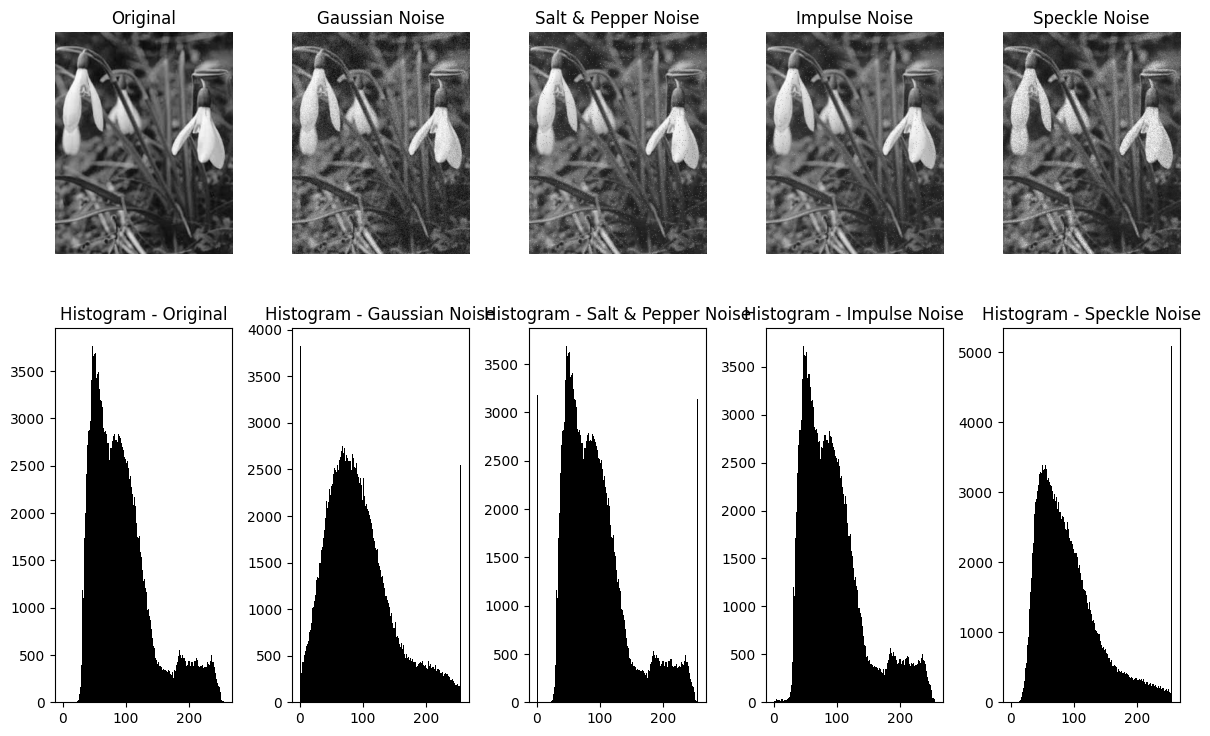

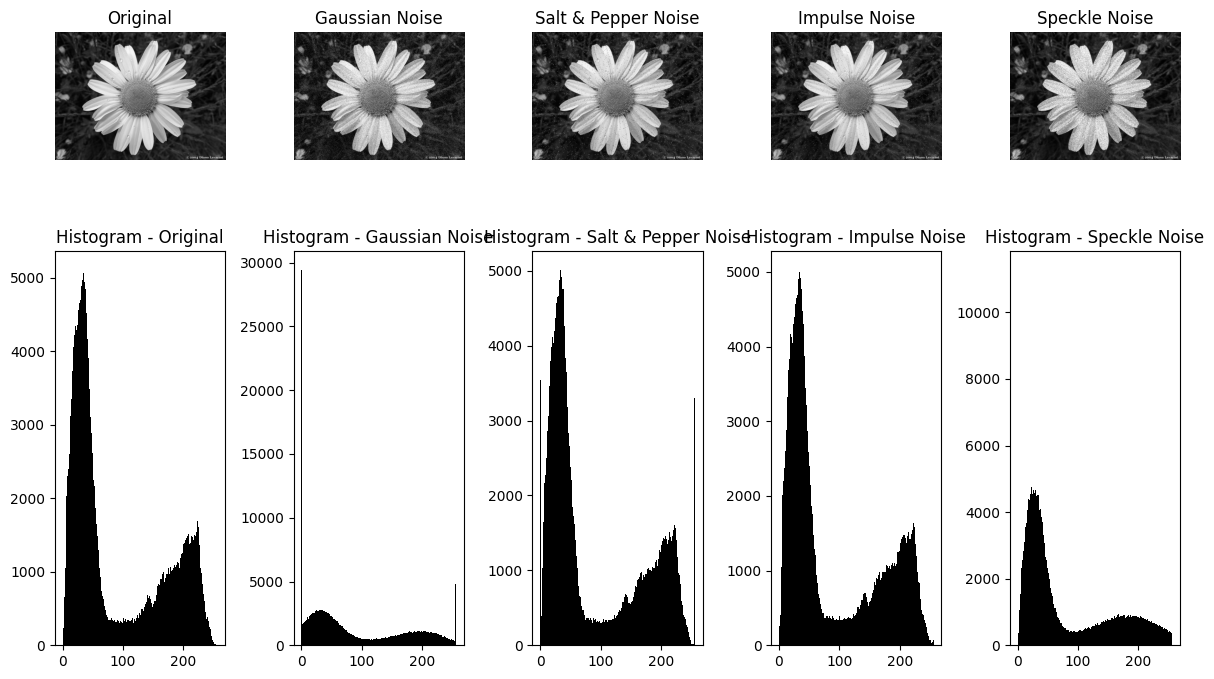

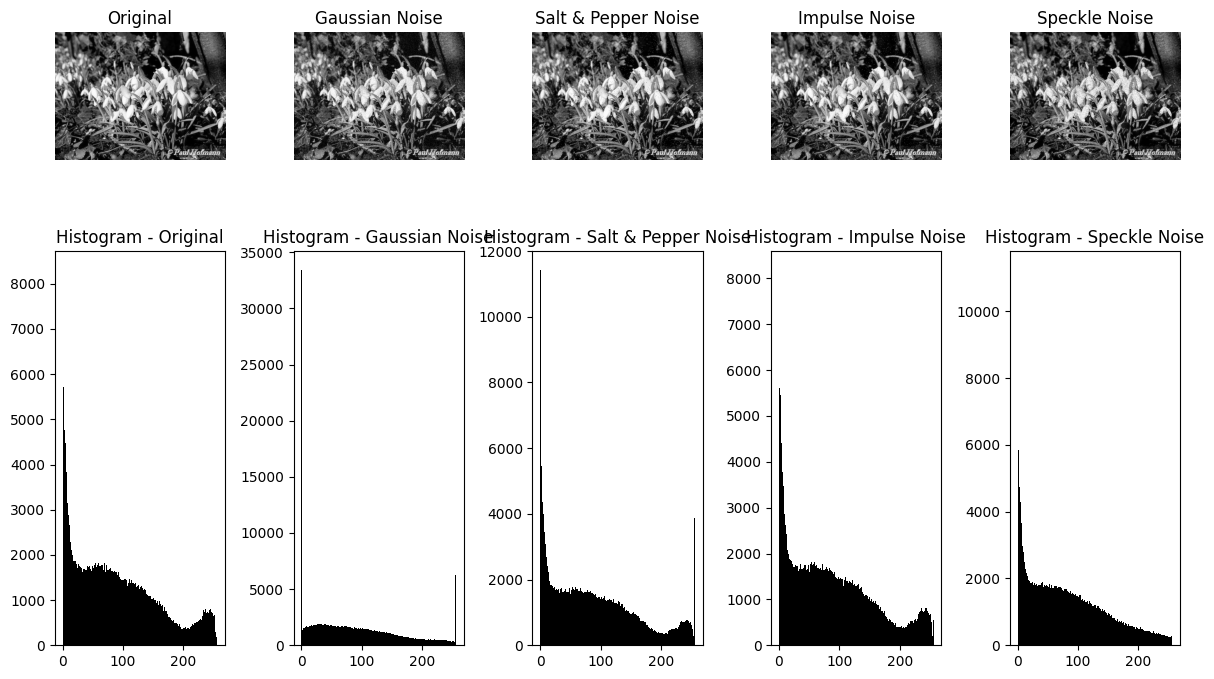

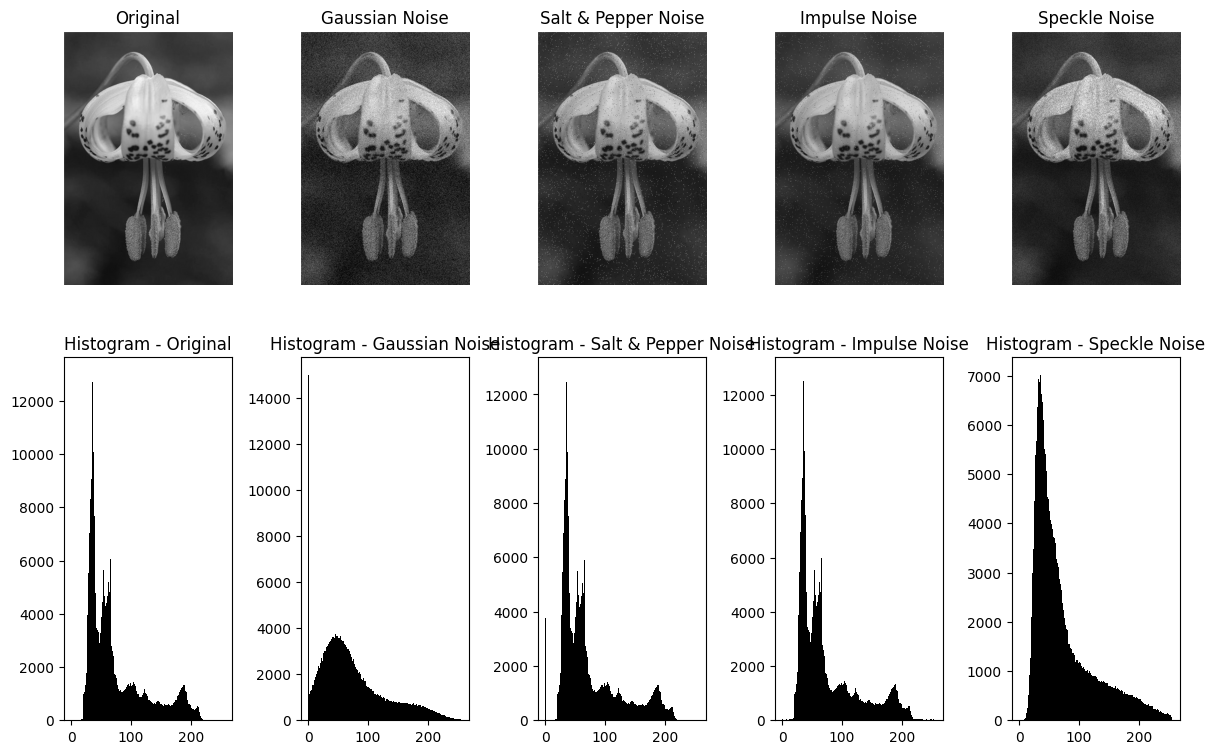

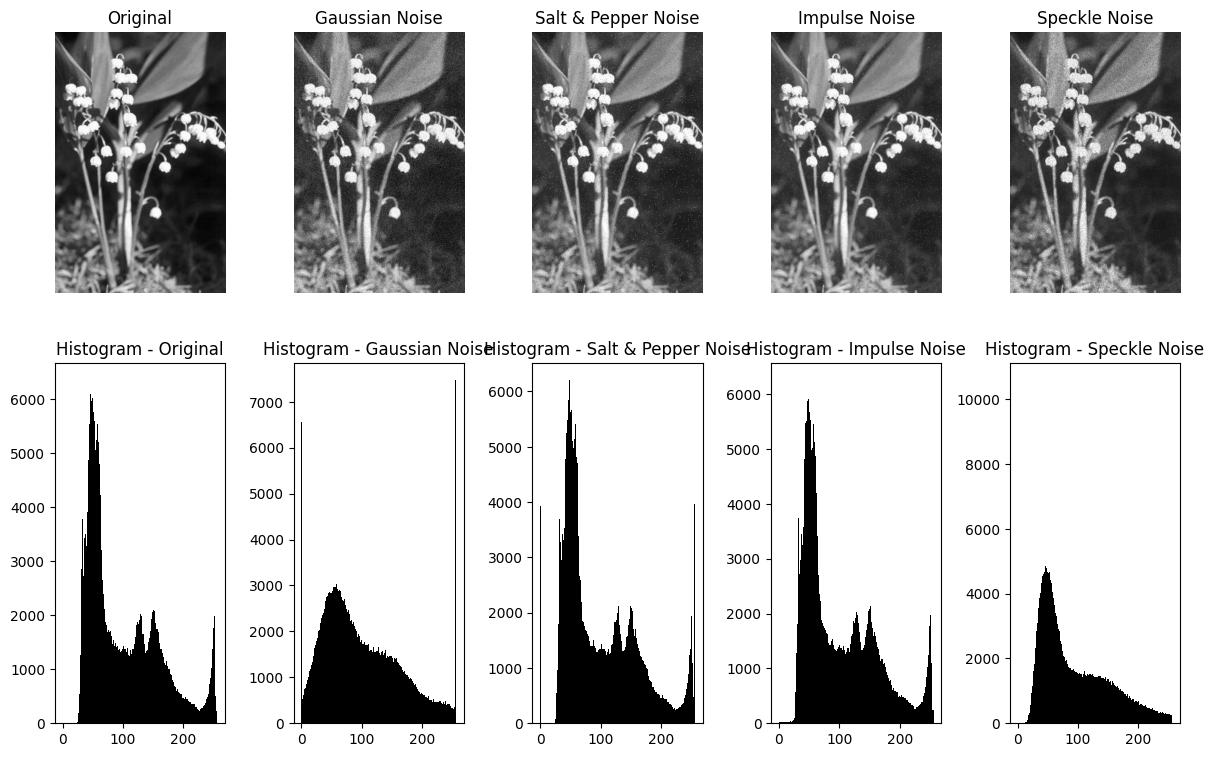

In [18]:
import matplotlib.pyplot as plt

if noisy_images_list:
    for noisy_images in noisy_images_list:
        plt.figure(figsize=(12, 8))
        num_noise_types = len(noisy_images)

        for i, (noise_type, noisy_img) in enumerate(noisy_images.items()):
            # Plot image
            plt.subplot(2, num_noise_types, i + 1)
            plt.imshow(noisy_img, cmap='gray')
            plt.title(noise_type)
            plt.axis('off')

            # Plot histogram
            plt.subplot(2, num_noise_types, i + num_noise_types + 1)
            plt.hist(noisy_img.ravel(), bins=256, range=[0, 256], color='black')
            plt.title(f"Histogram - {noise_type}")

        plt.tight_layout()
        plt.show()
else:
    print("No noisy images to display.")